#### Nota ordena quem tem maior nota


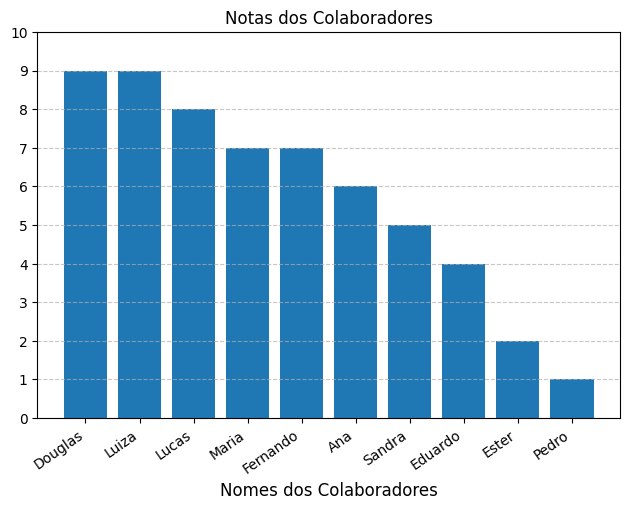

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('AED - dados.csv')

nota_df = df[['nome', 'nota']].groupby('nome').mean().sort_values('nota', ascending=False)

# Criando o gráfico de barras
plt.bar(nota_df.index, nota_df['nota'])

# Ajustando o layout do gráfico
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.yticks(np.arange(0, 11, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gcf().tight_layout()

# Adicionando rótulos aos eixos
plt.title('Notas dos Colaboradores')
plt.xlabel('Nomes dos Colaboradores', fontsize=12)


plt.show()



####  Salario médio por departamento

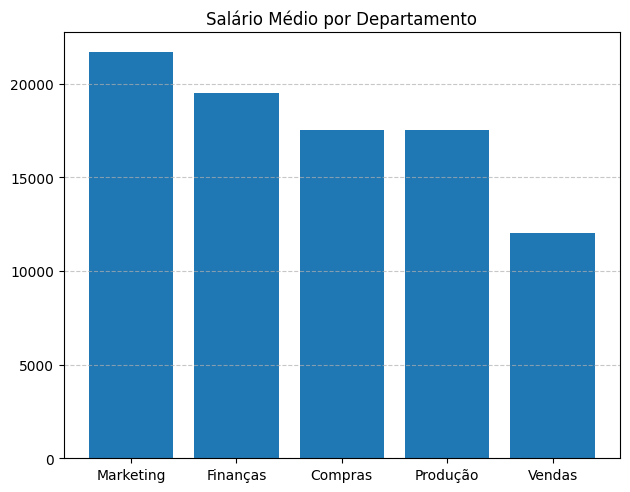

In [ ]:
salario_maior = df[['departamento', 'salario']].groupby('departamento').mean().sort_values('salario', ascending=False)

# Criando o gráfico de barras
plt.bar(salario_maior.index, salario_maior['salario'])

# Ajustando o layout do gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gcf().tight_layout()

# Adicionando rótulos e título
plt.title('Salário Médio por Departamento')


plt.show()

### Media de Idade


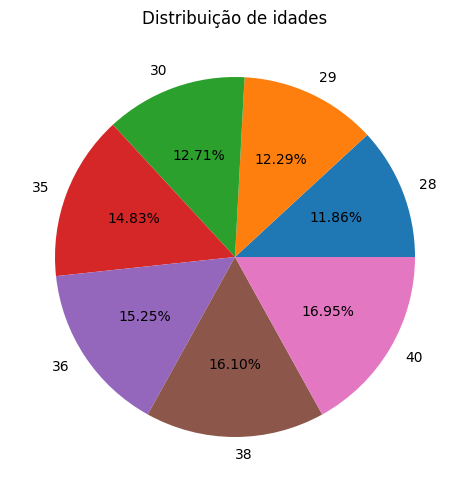

In [28]:

md_idade = df[['idade']].groupby('idade').median()

# Criando o gráfico de pizza
plt.pie(md_idade.index, labels=md_idade.index, autopct='%1.2f%%')
plt.gcf().tight_layout()
plt.title('Distribuição de idades')
plt.show()

#### Comparando Cargo com Escolaridade 

/tmp/ipykernel_22728/2093260789.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cg_esc_count = cg_esc_count.groupby('cargo').apply(lambda x: x.set_index('escolaridade')['contagem'].to_dict()).to_dict()


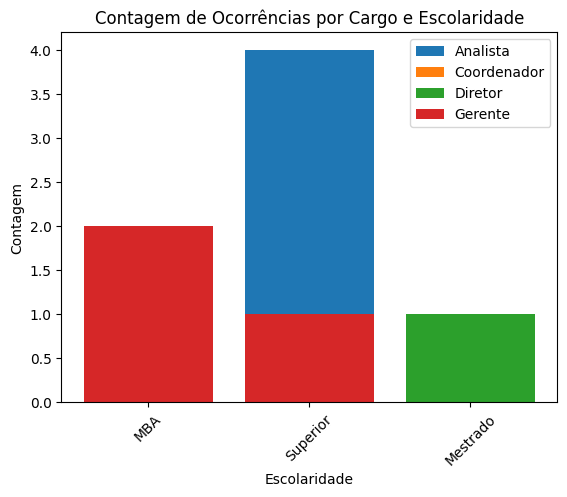

In [ ]:

# Agrupar por 'cargo' e 'escolaridade' e contar as ocorrências
cg_esc_count = df.groupby(['cargo', 'escolaridade']).size().reset_index(name='contagem')

# Agrupar por 'cargo' e somar as ocorrências de cada escolaridade
cg_esc_count = cg_esc_count.groupby('cargo').apply(lambda x: x.set_index('escolaridade')['contagem'].to_dict()).to_dict()

# Plotando o gráfico
for cargo, escolaridades in cg_esc_count.items():
    labels = list(escolaridades.keys())
    values = list(escolaridades.values())
    
    plt.bar(labels, values, label=cargo)

plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por Cargo e Escolaridade')
plt.legend()
plt.xticks(rotation=45)
plt.show()
